In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('diabetes_data_upload.csv')
df = data.copy()

In [48]:
df.shape

(520, 17)

In [4]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [8]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [14]:
df.groupby('Age')['class'].count()

Age
16     1
25     2
26     1
27     6
28     9
29     1
30    25
31     3
32     5
33     4
34     6
35    30
36     8
37     7
38    20
39    16
40    24
41     4
42     9
43    25
44     7
45    18
46     8
47    21
48    28
49     7
50    18
51     5
52     4
53    20
54    16
55    22
56     8
57    15
58    18
59     4
60    15
61     8
62     7
63     3
64     5
65     6
66     9
67     8
68    10
69     5
70     5
72     9
79     1
85     2
90     2
Name: class, dtype: int64

<Axes: xlabel='Age'>

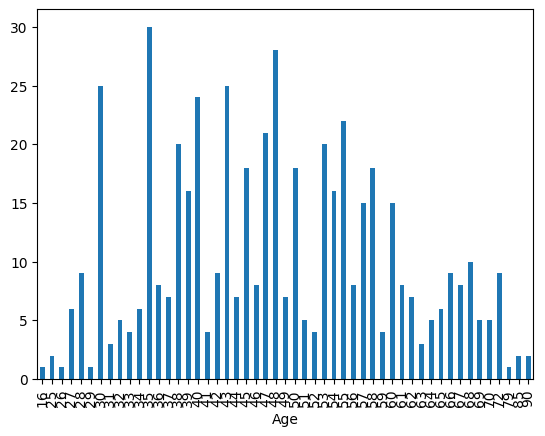

In [15]:
df.groupby('Age')['class'].count().plot(kind='bar')

In [16]:
df['class'].value_counts()

class
Positive    320
Negative    200
Name: count, dtype: int64

In [26]:
df.groupby('Gender')['class'].count()

Gender
Female    192
Male      328
Name: class, dtype: int64

<Axes: xlabel='Gender'>

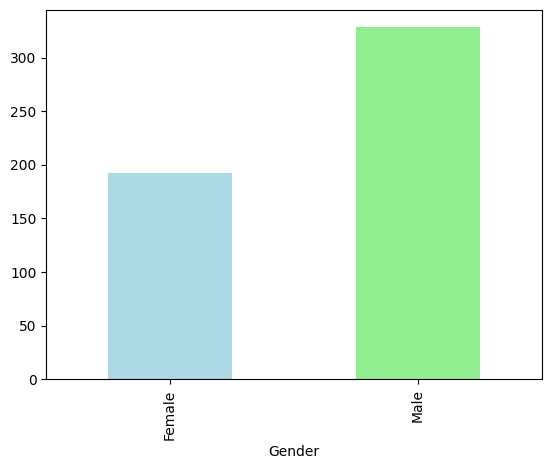

In [31]:
df.groupby('Gender')['class'].count().plot(kind='bar',color=['lightblue','lightgreen'])

In [37]:
#mapping the values of No = 0, yes = 1 for every columns where there is yes and no

In [35]:
mapping = {'No':0,
           'Yes':1}

for i in df.columns.drop(['Age','Gender','class']):
    df[i] = df[i].map(mapping)

In [38]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [40]:
gender = {'Male':1,
         'Female':0}
df['Gender'] = df['Gender'].map(gender)

In [41]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [42]:
features = df.drop('class',axis=1)
target = df['class']

In [43]:
features

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [44]:
target

0      Positive
1      Positive
2      Positive
3      Positive
4      Positive
         ...   
515    Positive
516    Positive
517    Positive
518    Negative
519    Negative
Name: class, Length: 520, dtype: object

In [46]:
features.corr()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458
Gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396
Polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567
Polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665
Polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785
Genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005
Itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894


<Axes: >

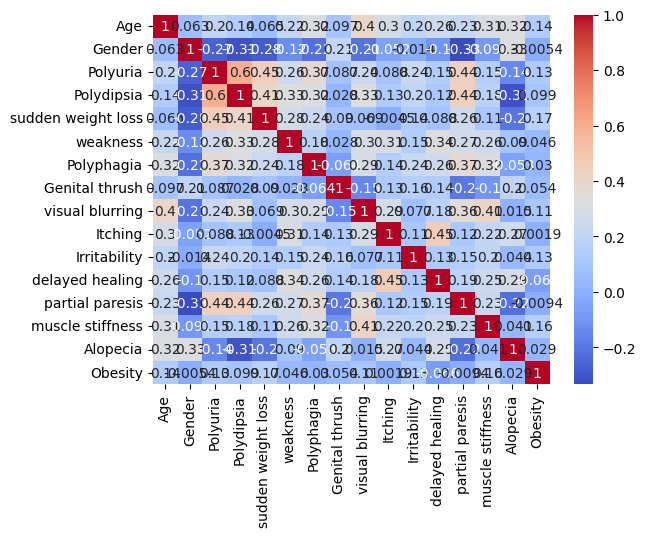

In [47]:
sns.heatmap(features.corr(),annot=True,cmap='coolwarm')

In [52]:
#splitting the data
from sklearn.model_selection import train_test_split_test_split
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=10)

In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(390, 16)
(130, 16)
(390,)
(130,)


In [82]:
#scaling the both training and testing sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_trainnew = scaler.fit_transform(x_train)
x_testnew = scaler.fit_transform(x_test)

In [55]:
#model building

In [56]:
#logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [83]:
logreg = LogisticRegression()
logreg.fit(x_trainnew,y_train)

LogisticRegression()

In [84]:
ypredlog = logreg.predict(x_testnew)

In [85]:
from sklearn.metrics import accuracy_score,r2_score

In [86]:
logregaccuracyscore = accuracy_score(y_test,ypredlog)
print('accuracy score of logistic Regression in Testing',logregaccuracyscore)

accuracy score of logistic Regression in Testing 0.9538461538461539


In [87]:
#support vector machine
from sklearn.svm import SVC
svc = SVC()

In [89]:
svc.fit(x_trainnew,y_train)

SVC()

In [90]:
ypredsvc = svc.predict(x_testnew)

In [91]:
accuracyscoresvc = accuracy_score(ypredsvc,y_test)
print('Accuracy score of SVC model:',accuracyscoresvc)

Accuracy score of SVC model: 0.9769230769230769


In [92]:
#DecisionTreeClassififer
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()

In [93]:
dectree.fit(x_trainnew, y_train)

DecisionTreeClassifier()

In [94]:
ypredtree = dectree.predict(x_testnew)

In [97]:
accuracyscoretree = accuracy_score(ypredtree,y_test)
print('Accuracy of Decision Tree is :',accuracyscoretree)

Accuracy of Decision Tree is : 0.9692307692307692


In [136]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
randomfc = RandomForestClassifier()

In [137]:
randomfc.fit(x_train,y_train)

RandomForestClassifier()

In [138]:
ypredrfc = randomfc.predict(x_test)

In [139]:
accuracyscorerfc = accuracy_score(ypredrfc,y_test)
print('accuracy score of RandomForestClassifier:',accuracyscorerfc)

accuracy score of RandomForestClassifier: 0.9846153846153847


In [102]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()

In [103]:
adaboost.fit(x_trainnew,y_train)

C:\Users\Admin\Anaconda\envs\notebook\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [104]:
ypredboost = adaboost.predict(x_testnew)

In [110]:
accuarcyscoreboost = accuracy_score(ypredboost,y_test)
print('Accuracy score of Adaboost is:',accuarcyscoreboost)

Accuracy score of Adaboost is: 0.9230769230769231


In [122]:
models = {'LogisticRegression':logregaccuracyscore,
          'Support Vector Machine':accuracyscoresvc,
          'RandomForest':accuracyscorerfc,
         'DecisionTree':accuracyscoretree,
         'Adaboost':accuarcyscoreboost}


In [125]:
models

{'LogisticRegression': 0.9538461538461539,
 'Support Vector Machine': 0.9769230769230769,
 'RandomForest': 0.9846153846153847,
 'DecisionTree': 0.9692307692307692,
 'Adaboost': 0.9230769230769231}

from the above models we can say that the random forest is performing well with unseen data so we go with RandomForestClassifer for the deployemnt

In [126]:
featuresnew = scaler.fit_transform(features)

In [127]:
featuresnew

array([[-0.6613669 ,  0.76509206, -0.99233705, ...,  1.29099445,
         1.38022749,  2.21564684],
       [ 0.82136224,  0.76509206, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.57899306,  0.76509206,  1.00772212, ...,  1.29099445,
         1.38022749, -0.45133547],
       ...,
       [ 0.82136224, -1.30703226,  1.00772212, ...,  1.29099445,
        -0.72451824,  2.21564684],
       [-1.32035762, -1.30703226, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.49661921,  0.76509206, -0.99233705, ..., -0.77459667,
        -0.72451824, -0.45133547]])

In [128]:
target

0      Positive
1      Positive
2      Positive
3      Positive
4      Positive
         ...   
515    Positive
516    Positive
517    Positive
518    Negative
519    Negative
Name: class, Length: 520, dtype: object

In [129]:
Randomforestmodel = randomfc.fit(features,target)

In [130]:
Randomforestmodel

RandomForestClassifier()

In [131]:
#dump into pkl file
import pickle
file = 'random_forest.pkl'
pickle.dump(Randomforestmodel,open(file,'wb'))

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [146]:
x_test.head(2)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
446,50,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0
390,47,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [145]:
y_test.head(2)

446    Positive
390    Negative
Name: class, dtype: object